# Project Playground - Module 4 - Ver.14

<br> David Mauger
<br> Data Science - Full Time Immersive
<br> Date: Nov 12, 2019
<br> Howard Smith & Amanda Yandow
<br> https://github.com/Maugy

# Project: Telecom Customer Churn

## Overview
1. [Objective & Background](#001)
2. [Obtaining Data & Defining Functions](#002)
3. [Scrubbing Data](#003)
4. [Exploring Data](#004)
5. [Modeling Data](#005)
6. [Interpreting Data](#006)


<a id="001"></a>

## 1) Objective & Background
***


**1.1 Objective:**
> Predict behavior to retain customers. Classify into likely Churn or not Churn customer. 
<br>

**1.2 Data Provided:** 
>**Telco Customer Churn**
<br> Using Kaggle's "Telco Customer Churn" dataset to create a classification model. Identify the dichotomous problem and preprocess and explore the data to then build and interpret a classification model that uses Logistic Regression.
<br>
<br> **The data set includes information about:**
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents <br>
<br> **Columns/Categories:**
- customerID: Customer ID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not 
- Partner: Whether the customer has a partner or not 
- Dependents: Whether the customer has dependents or not 
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not 
- MultipleLines: Whether the customer has multiple lines or not 
- InternetService: Customer’s internet service provider 
- OnlineSecurity: Whether the customer has online security or not 
- OnlineBackup: Whether the customer has online backup or not 
- DeviceProtection: Whether the customer has device protection or not 
- TechSupport: Whether the customer has tech support or not 
- StreamingTV: Whether the customer has streaming TV or not
- StreamingMovies: Whether the customer has streaming movies or not
- Contract: The contract term of the customer 
- PaperlessBilling: Whether the customer has paperless billing or not 
- PaymentMethod: The customer’s payment method 
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not 

**1.3 Methodology**
> OSEMN Process
>    - Obtain Data
>    - Scrub Data
>    - Explore Data
>    - Model Data
>    - Interpret Data

<a id="002"></a>

## 2) Obtaining Data & Defining Functions
***

In [1]:
import pandas as pd 
import pandas_profiling as pp
import numpy as np 

# from mlxtend.classifier import SoftmaxRegression
from sklearn import svm
# clf = svm.SVC(gamma=0.001, C=100.)

import itertools
from itertools import combinations
from itertools import cycle

import statsmodels as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.tree import DecisionTreeClassifier
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

from scipy import stats

import scipy.stats as st
from scipy.stats import shapiro

from imblearn.over_sampling import SMOTE, ADASYN

import warnings
warnings.filterwarnings('ignore') 

Using TensorFlow backend.
/Users/dmauger/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/dmauger/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/dmauger/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/User

In [2]:
from pivottablejs import pivot_ui

import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns 
sns.set_style('darkgrid')

In [3]:
def prediction_function(model,train_x,test_x, train_y,test_y, estimate=None):
    
    cols = [i for i in df.columns if i not in Id_col + target_col]
    
    model.fit(train_x,train_y)
    predictions = model.predict(test_x)
    probabilities = model.predict_proba(test_x)
    
    predict_train = model.predict(train_x)
    prob_train = model.predict_proba(train_x)
    
    if estimate == 'dec_tree':
        coefficients = pd.DataFrame(model.feature_importances_)
    elif estimate == 'rfe':
        coefficients = pd.DataFrame(model.estimator_.coef_.ravel())
    else:
        coefficients = pd.DataFrame(model.coef_.ravel())
    
    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (model)
    print ("\n Score Report : \n",classification_report(test_y,predictions))
    print ("Accuracy Score : ",accuracy_score(test_y,predictions))
    print ('Training Root Mean Square Error',np.sqrt(metrics.mean_squared_error(train_y,predict_train)))
    print ('Testing Root Mean Square Error',np.sqrt(metrics.mean_squared_error(test_y,predictions)))
    
    
    c_matrix = confusion_matrix(test_y,predictions)
    cnf_matrix = pd.DataFrame(c_matrix)
    
    model_roc_auc = roc_auc_score(test_y,predictions) 
    print ("AUC : ",model_roc_auc,"\n")
    test_fpr,test_tpr,test_thresholds = roc_curve(test_y, probabilities[:,1])
    train_fpr,train_tpr,train_thresholds = roc_curve(train_y, prob_train[:,1])
    
    trace1 = go.Heatmap(z = cnf_matrix ,
                        x = ["Not Churn","Churn"],
                        y = ["Not Churn","Churn"],
                        showscale  = False,colorscale = "Viridis",
                        name = "matrix")
    
    trace2 = go.Scatter(x = test_fpr,y = test_tpr,
                        name = "ROC Test",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    trace4 = go.Scatter(x = train_fpr,y=train_tpr,
                        name= "ROC Train",
                        line = dict(color = ('rgb(255, 128, 0)'),width = 2))
    
    trace5 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('ROC Curve','Confusion Matrix','Feature Ranking'))
    
    fig.append_trace(trace1,1,2)
    fig.append_trace(trace2,1,1)
    fig.append_trace(trace3,1,1)
    fig.append_trace(trace4,1,1)
    fig.append_trace(trace5,2,1)
    
    fig['layout'].update(showlegend=False, title="Model Performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    
    py.iplot(fig)

In [4]:
def model_score(model,train_x,test_x,train_y,test_y,name):
    model.fit(train_x,train_y)
    predictions  = model.predict(test_x)
    accuracy     = accuracy_score(test_y,predictions)
    recallscore  = recall_score(test_y,predictions)
    precision    = precision_score(test_y,predictions)
    roc_auc      = roc_auc_score(test_y,predictions)
    f1score      = f1_score(test_y,predictions) 
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc]})
    return df


In [5]:
def model_compare(metric,color) :
    chart = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color))
    return chart

In [6]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df_original = df.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="003"></a>

## 3)  Scrubbing Data
***


**3.1** - [Data Observations](#3.1) 
<br>**3.2** - [Modify Datatypes & Replace Values](#3.2) 
<br> 

<a id="3.1"></a>

### 3.1 - Data Observations

In [7]:
print('\n *Data Shape* \n', df.shape)
print('\n *Data Types* \n')
print(df.dtypes)


 *Data Shape* 
 (7043, 21)

 *Data Types* 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [8]:
print('\n *Data Info* \n')
df.info()


 *Data Info* 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1

In [9]:
print('\n *Data Description* \n')
df.describe()


 *Data Description* 



,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=False).head(), '\n\n')

customerID 
 4003-FUSHP    1
7291-CDTMJ    1
7684-XSZIY    1
1468-DEFNC    1
2805-AUFQN    1
Name: customerID, dtype: int64 


gender 
 Male      3555
Female    3488
Name: gender, dtype: int64 


SeniorCitizen 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64 


Partner 
 No     3641
Yes    3402
Name: Partner, dtype: int64 


Dependents 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 


tenure 
 1     613
72    362
2     238
3     200
4     176
Name: tenure, dtype: int64 


PhoneService 
 Yes    6361
No      682
Name: PhoneService, dtype: int64 


MultipleLines 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 


InternetService 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 


OnlineSecurity 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 


OnlineBackup 
 No                     3088
Yes 

<a id="3.2"></a>

### 3.2 - Modify Datatypes & Replace Values

In [11]:
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols: 
    df[i] = df[i].replace({'No internet service' : 'No'})

In [12]:
replace_phone = ['MultipleLines']
for i in replace_phone:
    df[i] = df[i].replace({'No phone service': 'No'})

In [13]:
total_charges_filter = df.TotalCharges == " "
df = df[~total_charges_filter]
df.TotalCharges = pd.to_numeric(df.TotalCharges)
df_original.TotalCharges = pd.to_numeric(df.TotalCharges)

In [14]:
df['gender'] = df['gender'].map({'Male':1, 'Female':0}).astype(float)
df['Partner'] = df['Partner'].map({'Yes':1, 'No':0}).astype(float)
df['Dependents'] = df['Dependents'].map({'Yes':1, 'No':0}).astype(float)
df['PhoneService'] = df['PhoneService'].map({'Yes':1, 'No':0}).astype(float)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(float)
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0}).astype(float)
df['InternetService'] = df['InternetService'].map({'Fiber optic': 1, 'DSL': 1, 'No': 0}).astype(float)
df['MultipleLines'] = df['MultipleLines'].map({'Yes':1, 'No':0}).astype(float)
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes':1, 'No':0}).astype(float)
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes':1, 'No':0}).astype(float)
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes':1, 'No':0}).astype(float)
df['TechSupport'] = df['TechSupport'].map({'Yes':1, 'No':0}).astype(float)
df['StreamingTV'] = df['StreamingTV'].map({'Yes':1, 'No':0}).astype(float)
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes':1, 'No':0}).astype(float)
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1, 'No':0}).astype(float)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['tenure'] = df['tenure'].astype(float)
df = df.drop(['customerID'], axis=1)

In [15]:
Id_col = ['customerID']
target_col = ['Churn']
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [i for i in cat_cols if i not in target_col]
num_cols = [i for i in df.columns if i not in cat_cols + target_col + Id_col]
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [16]:
df = pd.get_dummies(data=df, columns=multi_cols, dtype='float')

In [17]:
df.dropna(inplace=True)

In [18]:
df['gender'] = df['gender'].astype(float)
df['Partner'] = df['Partner'].astype(float)
df['Dependents'] = df['Dependents'].astype(float)
df['PhoneService'] = df['PhoneService'].astype(float)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(float)
df['Churn'] = df['Churn'].astype(float)
df['InternetService'] = df['InternetService'].astype(float)
df['MultipleLines'] = df['MultipleLines'].astype(float)
df['OnlineSecurity'] = df['OnlineSecurity'].astype(float)
df['OnlineBackup'] = df['OnlineBackup'].astype(float)
df['DeviceProtection'] = df['DeviceProtection'].astype(float)
df['TechSupport'] = df['TechSupport'].astype(float)
df['StreamingTV'] = df['StreamingTV'].astype(float)
df['StreamingMovies'] = df['StreamingMovies'].astype(float)
df['PaperlessBilling'] = df['PaperlessBilling'].astype(float)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['tenure'] = df['tenure'].astype(float)

In [19]:
df['Contract_Month-to-month'] = df['Contract_Month-to-month'].astype(float)
df['Contract_One year'] = df['Contract_One year'].astype(float)
df['Contract_Two year'] = df['Contract_Two year'].astype(float)
df['PaymentMethod_Bank transfer (automatic)'] = df['PaymentMethod_Bank transfer (automatic)'].astype(float)
df['PaymentMethod_Credit card (automatic)'] = df['PaymentMethod_Credit card (automatic)'].astype(float)
df['PaymentMethod_Electronic check'] = df['PaymentMethod_Electronic check'].astype(float)
df['PaymentMethod_Mailed check'] = df['PaymentMethod_Mailed check'].astype(float)

<a id="004"></a>

## 4) Data Exploration & Plotting
***

In [20]:
# pivot_ui(df,outfile_path='pivottablejs.html')

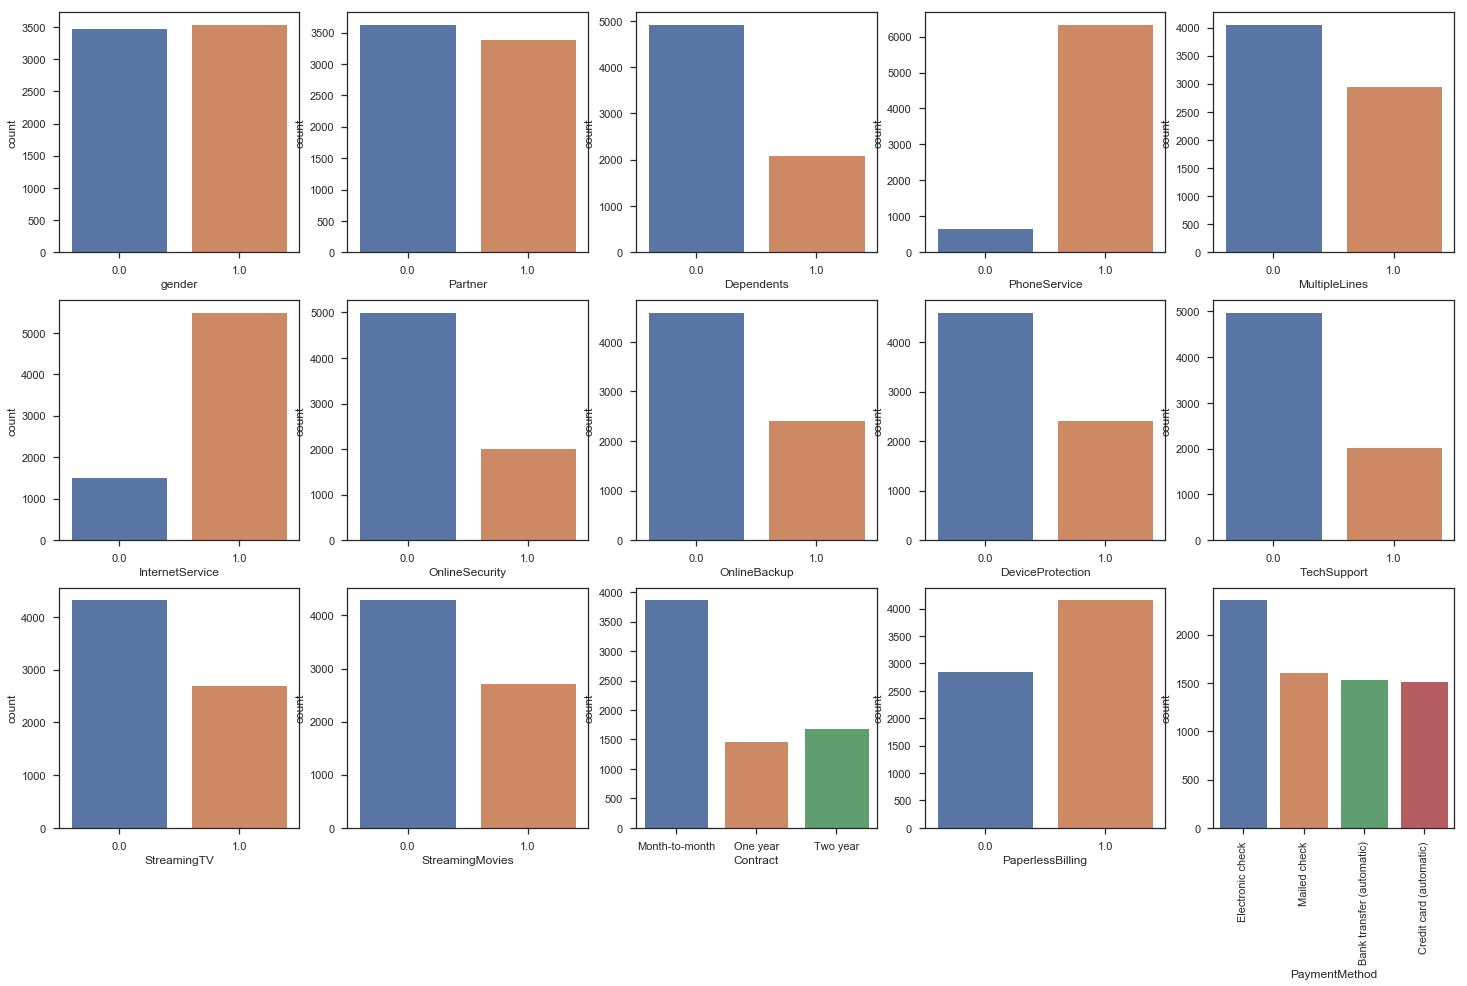

In [21]:
sns.set(style="ticks", color_codes=True)

fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
sns.countplot(x = "gender", data = df, ax=axes[0][0])
sns.countplot(x = "Partner", data = df, ax=axes[0][1])
sns.countplot(x = "Dependents", data = df, ax=axes[0][2])
sns.countplot(x = "PhoneService", data = df, ax=axes[0][3])
sns.countplot(x = "MultipleLines", data = df, ax=axes[0][4])
sns.countplot(x = "InternetService", data = df, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = df, ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = df, ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = df, ax=axes[1][3])
sns.countplot(x = "TechSupport", data = df, ax=axes[1][4])
sns.countplot(x = "StreamingTV", data = df, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = df, ax=axes[2][1])
sns.countplot(x = "Contract", data = df_original, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling", data = df, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", data = df_original, ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

In [22]:
df_Churn = df_original[df_original.Churn == 'Yes']
df_no_Churn = df_original[df_original.Churn == 'No']
print(df_Churn.Contract.value_counts())
print(df_no_Churn.Contract.value_counts())

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64
Month-to-month    2220
Two year          1647
One year          1307
Name: Contract, dtype: int64


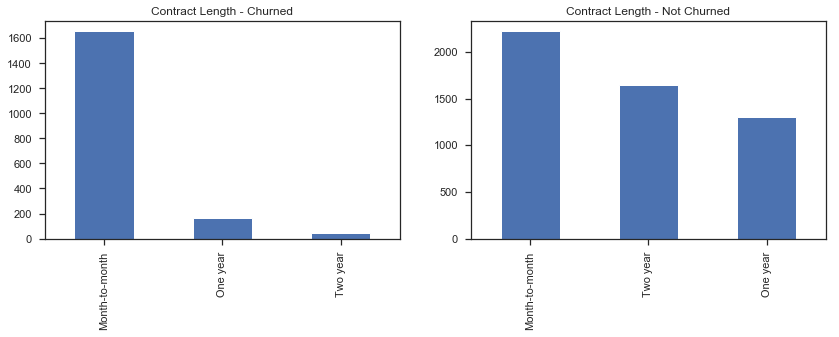

In [23]:
Contract_Churn = df_Churn.Contract.value_counts()
Contract_No_Churn = df_no_Churn.Contract.value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
Contract_Churn.plot(kind='bar', ax=ax[0]).set_title('Contract Length - Churned')
Contract_No_Churn.plot(kind='bar', ax=ax[1]).set_title('Contract Length - Not Churned')
plt.show()

In [24]:
cat = ['less_10', '10-20', '20-40', '40-60', 'over 60']
bins = [0., 10., 20., 40., 60., 100.]
tenure_bins = pd.cut(df_original['tenure'], bins, labels=cat, right=False)

print('\n Tenure Bins:')
print(tenure_bins.unique())
print(tenure_bins.value_counts())


 Tenure Bins:
[less_10, 20-40, 40-60, 10-20, over 60]
Categories (5, object): [less_10 < 10-20 < 20-40 < 40-60 < over 60]
less_10    1854
over 60    1483
20-40      1415
40-60      1338
10-20       953
Name: tenure, dtype: int64


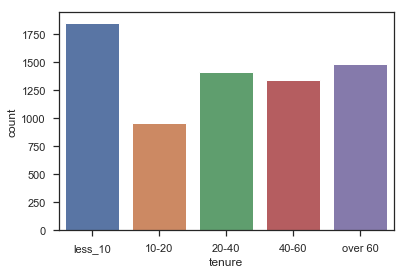

In [25]:
sns.countplot(tenure_bins);

In [26]:
df_Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


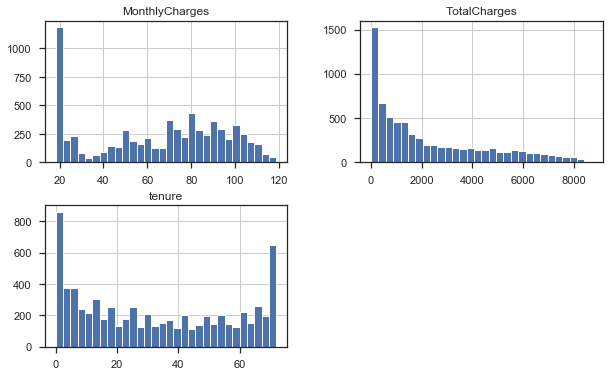

In [27]:
df_original[['MonthlyCharges','TotalCharges', 'tenure']].hist(bins=30, figsize=(10,6));

<a id="005"></a>

<a id="005"></a>

## 5) Modeling Data
***

5.1 [Baseline Model](#5.1)
<br>5.2 [SMOTE](#5.2)
<br>5.3 [Lasso](#5.3)
<br>5.4 [Ridge](#5.4)
<br>5.5 [RFE](#5.5)
<br>5.6 [Decision Tree](#5.6)
<br>

> - Precision: What proportion of positive identifications were actually correct?
- Recall: What proportion of actual positives were identified correctly?
- 𝐹1 𝑆𝑐𝑜𝑟𝑒: Combines precision and recall into a single metric. A simple way to compare two classifiers. The harmonic mean of precision and recall (the regular mean treats all values equally, the harmonic mean gives much more weight to low values.) A classifier will only get a high F1 score if both recall and precision are high.
- The ROC Curve: The best performing models will have an ROC curve that hugs the upper left corner of the graph.
- AUC: A perfect classifier will have a AUC equal to 1. Purely random classifier will have a AUC equal to 0.5.

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,29.85,29.85,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,1.0,1.0,0.0,...,56.95,1889.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,...,53.85,108.15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,1.0,1.0,0.0,...,42.30,1840.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,...,70.70,151.65,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<a id="5.1"></a>

### 5.1 Baseline Model

In [29]:
X = df.drop(columns=['Churn'], axis=1)
y = pd.DataFrame(df['Churn'])

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)

baseline = logit_model.fit()
baseline.summary()

Optimization terminated successfully.
         Current function value: 0.414610
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7009
Method:                           MLE   Df Model:                           22
Date:                Wed, 27 Nov 2019   Pseudo R-squ.:                  0.2839
Time:                        11:11:08   Log-Likelihood:                -2915.5
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8002   9.28e+06  -8.62e-08      1.000   -1.82e+07    1.82e+07
gender                                     -0.0249      0.065     -0.384      0.701      -0.152       0.102
SeniorCitizen                               0.2162      0.084      2.559      0.010       0.051       0.382
Partner                                     0.0037      0.078      0.047      0.962      -0.149       0.156
Dependents                                 -0.1500      0.090     -1.673      0.094      -0.326       0.026
tenure                                     -0.0603      0.006     -9.700      0.000      -0.073      -0.048
PhoneService                               -1.1977      0.175     -6.858      0.000      -1.540      -0.855
MultipleLines                               0.1061      0.083      1.271      0.204      -0.058       0.270
InternetService                             0.0684      0.192      0.355      0.722      -0.309       0.446
OnlineSecurity                             -0.5508      0.084     -6.520      0.000      -0.716      -0.385
OnlineBackup                               -0.3174      0.079     -4.027      0.000      -0.472      -0.163
DeviceProtection                           -0.1956      0.081     -2.407      0.016      -0.355      -0.036
TechSupport                                -0.5298      0.085     -6.214      0.000      -0.697      -0.363
StreamingTV                                -0.0959      0.091     -1.059      0.290      -0.273       0.082
StreamingMovies                            -0.0881      0.090     -0.975      0.329      -0.265       0.089
PaperlessBilling                            0.3477      0.074      4.671      0.000       0.202       0.494
MonthlyCharges                              0.0287      0.004      7.332      0.000       0.021       0.036
TotalCharges                                0.0003   7.05e-05      4.634      0.000       0.000       0.000
Contract_Month-to-month                     0.4083   5.38e+06   7.59e-08      1.000   -1.05e+07    1.05e+07
Contract_One year                          -0.2579   5.47e+06  -4.71e-08      1.000   -1.07e+07    1.07e+07
Contract_Two year                          -0.9507   5.26e+06  -1.81e-07      1.000   -1.03e+07    1.03e+07
PaymentMethod_Bank transfer (automatic)    -0.2396    3.7e+06  -6.48e-08      1.000   -7.24e+06    7.24e+06
PaymentMethod_Credit card (automatic)      -0.3278    3.7e+06  -8.87e-08      1.000   -7.24e+06    7.24e+06
PaymentMethod_Electronic check              0.0662    3.7e+06   1.79e-08      1.000   -7.24e+06    7.24e+06
PaymentMethod_Mailed check                 -0.2990    3.7e+06  -8.09e-08      1.000   -7.24e+06    7.24e+06
===========================================================================================================
"""

In [30]:
y.head()

,Churn
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


### Train/Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

logreg = LogisticRegression() 
baseline_log = logreg.fit(X_train, y_train)
print(baseline_log) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [32]:
prediction_function(baseline_log, X_train, X_test, y_train, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

 Score Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1283
         1.0       0.67      0.53      0.60       475

    accuracy                           0.80      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.79      0.80      0.80      1758

Accuracy Score :  0.8037542662116041
Training Root Mean Square Error 0.44683185100401285
Testing Root Mean Square Error 0.4429963135155821
AUC :  0.7190441809902777 



### Scaling

In [33]:
scaler = StandardScaler().fit(X_train)
X_trans = scaler.transform(X_train)
X_train_transformed = pd.DataFrame(X_trans, columns=X_train.columns, index=X_train.index)

In [34]:
scaler = StandardScaler().fit(X_test)
X_testy = scaler.transform(X_test)
X_test_transformed = pd.DataFrame(X_testy, columns=X_train.columns, index=X_test.index)

<a id="5.2"></a>

### 5.2 SMOTE


In [35]:
# X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X, y, test_size = .25, random_state = 6)

smote = SMOTE()
X_smote_train, y_smote_train = smote.fit_sample(X_train_transformed, y_train) 
X_smote_test, y_smote_test = smote.fit_sample(X_test_transformed, y_test) 
smote_log = LogisticRegression(fit_intercept = False, C = 1e12,solver ='lbfgs', random_state=6)
smote_logit = smote_log.fit(X_smote_train, y_smote_train)   

In [36]:
prediction_function(smote_logit, X_smote_train, X_smote_test, y_smote_train, y_smote_test)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=6, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 Score Report : 
               precision    recall  f1-score   support

         0.0       0.87      0.63      0.73      1283
         1.0       0.71      0.91      0.80      1283

    accuracy                           0.77      2566
   macro avg       0.79      0.77      0.77      2566
weighted avg       0.79      0.77      0.77      2566

Accuracy Score :  0.7704598597038191
Training Root Mean Square Error 0.4907652345713962
Testing Root Mean Square Error 0.4791034755626188
AUC :  0.7704598597038192 



<a id="5.3"></a>

### 5.3 Lasso Model

In [37]:
log_lasso = LogisticRegression(penalty='l1', random_state=6)
logit_lasso = log_lasso.fit(X_train_transformed,y_train)
prediction_function(logit_lasso,X_train_transformed,X_test_transformed,y_train,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=6, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

 Score Report : 
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1283
         1.0       0.67      0.58      0.62       475

    accuracy                           0.81      1758
   macro avg       0.76      0.74      0.75      1758
weighted avg       0.80      0.81      0.81      1758

Accuracy Score :  0.8100113765642776
Training Root Mean Square Error 0.4444918442680149
Testing Root Mean Square Error 0.43587684434450336
AUC :  0.7365894080485703 



<a id="5.4"></a>

### 5.4 Ridge Model (Balanced)

In [38]:
ridge_logreg = LogisticRegression(class_weight='balanced', random_state=6)
ridge_logit = ridge_logreg.fit(X_train_transformed,y_train)

prediction_function(ridge_logit,X_train_transformed,X_test_transformed,y_train,y_test)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=6, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

 Score Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.73      0.82      1283
         1.0       0.54      0.84      0.65       475

    accuracy                           0.76      1758
   macro avg       0.73      0.78      0.74      1758
weighted avg       0.82      0.76      0.77      1758

Accuracy Score :  0.7610921501706485
Training Root Mean Square Error 0.5061247925663791
Testing Root Mean Square Error 0.48878200645006514
AUC :  0.7846133650572261 



<a id="5.5"></a>

### 5.5 RFE

In [39]:
logit = LogisticRegression()
rfe = RFE(logit, 10)
X_rfe_train = rfe.fit_transform(X_train_transformed,y_train)
X_rfe_test = rfe.transform(X_test_transformed)
rfe = rfe.fit(X_rfe_train,y_train.values.ravel())
prediction_function(rfe,X_rfe_train,X_rfe_test,y_train,y_test, 'rfe')

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

 Score Report : 
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1283
         1.0       0.67      0.57      0.61       475

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758

Accuracy Score :  0.8065984072810012
Training Root Mean Square Error 0.4485260062791054
Testing Root Mean Square Error 0.43977447938574027
AUC :  0.7315994585059687 



<a id="5.6"></a>

### 5.6 Decision Tree

In [40]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=6, class_weight='balanced')
dec_tree = clf_tree.fit(X_train_transformed, y_train)

In [41]:
prediction_function(dec_tree,X_train_transformed,X_test_transformed,y_train,y_test, 'dec_tree')

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=6, splitter='best')

 Score Report : 
               precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1283
         1.0       0.52      0.79      0.62       475

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.76      1758

Accuracy Score :  0.742320819112628
Training Root Mean Square Error 0.5146691541788548
Testing Root Mean Square Error 0.5076210997263333
AUC :  0.7571686425729172 



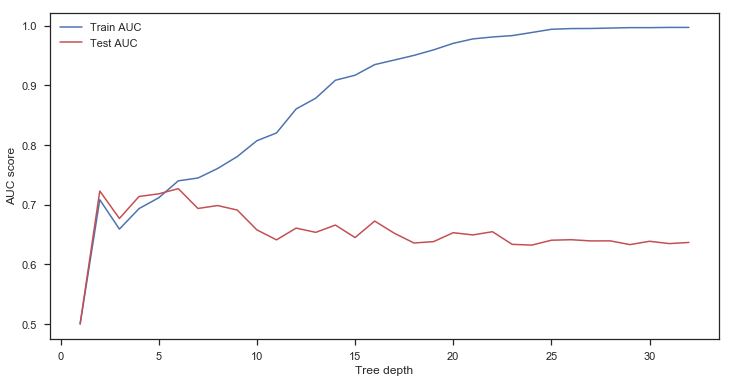

In [42]:
y_pred = clf_tree.predict(X_test_transformed)
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
   dt.fit(X_train_transformed, y_train)
   train_pred = dt.predict(X_train_transformed)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test_transformed)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

<a id="006"></a>

## 6) Interpreting Data
***

### Model Comparison


In [43]:
model1 = model_score(baseline_log, X_train, X_test, y_train, y_test,"Baseline")
model2 = model_score(smote_logit, X_smote_train, X_smote_test, y_smote_train, y_smote_test,"SMOTE")
model3 = model_score(rfe,X_rfe_train,X_rfe_test,y_train,y_test,"RFE")
model4 = model_score(logit_lasso,X_train_transformed,X_test_transformed,y_train,y_test,"Lasso")
model5 = model_score(ridge_logit,X_train_transformed,X_test_transformed,y_train,y_test, "Ridge")
model6 = model_score(dec_tree,X_train_transformed,X_test_transformed,y_train,y_test, "Decision Tree")
model_performances = pd.concat([model1,model2,model3,model4,model5,model6],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1)

dataframe  = ff.create_table(np.round(model_performances,4))

py.iplot(dataframe)

In [44]:
model_performances

layout = go.Layout(dict(title = "Model Comparison",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780))

trace1  = model_compare("Accuracy_score","#1bde65")
trace2  = model_compare('Recall_score',"#d93311")
trace3  = model_compare('Precision',"#3ae8d7")
trace4  = model_compare('f1_score',"#0f3175")

data = [trace1,trace2,trace3,trace4]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)